# II. End to End Machine Learning Project

Follow along!! This is as basic stuff as it gets. A nice refresher on basic pandas manipulation, and how to conduct a ML project.

The goal here is to predict the median house value of each block in California, based on data available regarding the housing in the state. 

The dataset used is based on the **California Housing Prices** from StatLib.

### Setup

#### Downloading the data

Download the ``housing.tgz`` file from the data repo.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile

def load_housing_data():
    tarball_path = Path("../data/housing/housing.tgz")
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="../data/")
    return pd.read_csv(Path("../data/housing/housing.csv"))

housing = load_housing_data()

#### Formatting the graphs

If some of the graphs don't display beautifully, change some values accordingly.

In [2]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

## Exploratory Data Analysis

### First steps

Gotta start with the most basic views. First, a quick glance at the dataframe's head (you could look at the tail if you're edgy)

In [3]:
display(housing.head())
# display(housing.tail())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We get an idea of how the DataFrame looks like. To have a more rigorous display, use ``info()``:

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


First is described how many entries are in the DataFrame (as well as how they are indexed). Then, every column has its name detailed, along with its non-null values count, and its data type.
For instance, `longitude` is a numerical variable with no missing value, whereas `ocean_proximity` is a categorical variable. 

It seems that `total_bedrooms` is the only variable that contains missing entries. There are multiple ways to show this.

In [5]:
print(housing.isna().sum())
print(f"housing has {housing.isna().sum().sum()} missing values, housing.total_bedrooms has {housing.total_bedrooms.isna().sum()} missing values")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
housing has 207 missing values, housing.total_bedrooms has 207 missing values


We'll deal with these missing values later. For now let's continue the EDA. For numerical variables, the ``describe()`` method yields the basic statistics associated:

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Looking back on `ocean_proximity` (the only categorical variable here), we can do a ``value_counts()`` to check its categories.

In [7]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Continuing with the numerical variables, we can plot each histogram with ``hist()``:

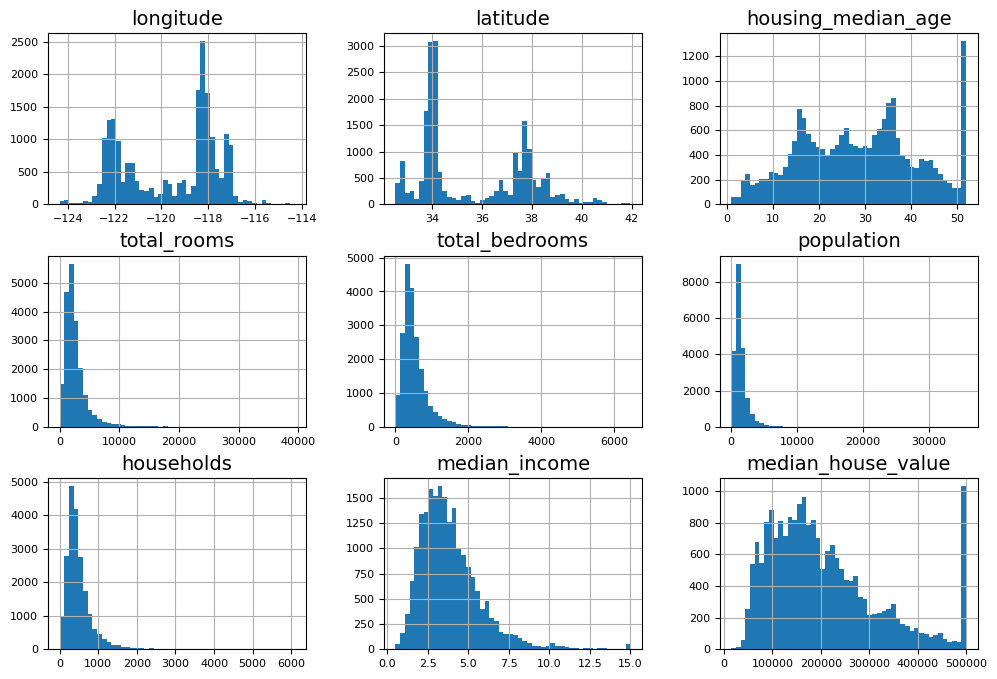

In [8]:
housing.hist(bins = 50, figsize = (12, 8)) # Can play around with the number of bins
plt.show()

Things to notice: 

* ``median_income``'s unit is most likely (*spoiler: it is*) 10 000 USD per year. It is capped at 0.5k (resp. 15k) for the lowest (resp. highest) median incomes.
* ``housing_median_age`` and ``median_house_value`` have also been capped. This is an issue since it affects our target variable. 
* The scales vary drastically. 
* Some distributions are highly asymmetrical $-$ we'd like to transform them into bell curves.

### Creating a Test Set

#### Creating it by ourselves (optional)

Let's first build it using ``numpy``:

In [9]:
import numpy as np

def split_train_test(data, test_ratio = 0.2): 
    shuffled_idx = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_idx  = shuffled_idx[:test_size]
    train_idx = shuffled_idx[test_size:]
    return data.iloc[train_idx], data.iloc[test_idx]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"Total set size: {len(housing)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16512    Test set size: 4128


Not optimal though, since running the cell yields a different test set each time. To address this issue, we could use a hash function that remains stable during each execution:

In [11]:
from zlib import crc32

def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) < test_ratio * 2**32

def split_train_test_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index() # housing doesn't have an index column so we have to add it manually
train_set, test_set = split_train_test_id_hash(housing_with_id, 0.2, "index")
print(f"Total set size: {len(housing_with_id)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16512    Test set size: 4128


Using the default index as an identifier is a great start, but it lacks robustness. We could construct an ID off stable, existing columns such as longitude and latitude, ensuring uniqueness:

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_id_hash(housing_with_id, 0.2, "id")
print(f"Total set size: {len(housing_with_id)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16322    Test set size: 4318


#### Using Scikit-Learn

Obviously, Scikit-Learn has some neat built-in components to split datasets. ``train_test_split()`` is the basic function that achieves this. (``random_state`` is set here for reproducibility)

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1234)

If the dataset is sufficiently large (typically when there are way more observations than there are variables), we can move on. Otherwise we might introduce sample bias. In this case, consider **stratified sampling** instead. 

*See annex 1.*

Suppose that median_income is actually an important feature to predict median house values. We have to ensure that all kinds of median incomes are represented in our dataset. First, we need to categorize the variable using ``pd.cut()``:

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

A quick look at the histogram of ``income_cat`` shows that the values are not uniformly distributed across the bins.

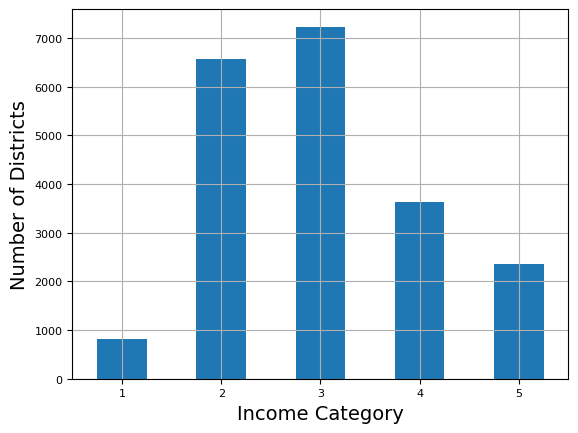

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
# housing["income_cat"].hist() also works
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

Next, we'll use the ``StratifiedShuffleSplit`` function. This generates a "splitter", which in turn creates stratified samples of our dataset. We can verify it by printing the ratio of each sample based on ``income_cat``:

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_idx, test_idx in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_idx]
    strat_test_set_n = housing.iloc[test_idx]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0] # Can use other indices (there are n_splits different folds)

# We can do this more easily and without using StratifiedShuffleSplit, since tts has a nice argument stratify: 
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"])

print(f"Stratified test set:\n{strat_test_set['income_cat'].value_counts(normalize = True)}")
#print(strat_train_set["income_cat"].value_counts(normalize = True))

print(f"Full dataset:\n{housing['income_cat'].value_counts(normalize = True)}") # Roughly the same

# For the sake of comparison: see how a normal train_test_split behaves

normal_train_set, normal_test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Using train_test_split without stratify:\n{normal_test_set['income_cat'].value_counts(normalize = True)}")


Stratified test set:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64
Full dataset:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64
Using train_test_split without stratify:
income_cat
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: proportion, dtype: float64


Below is the comparison table.

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts(normalize = True)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(normal_test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Don't forget to drop ``income_cat`` afterwards to return the datasets to their original forms.

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

### Data Visualization and Correlation Search

In [20]:
housing = strat_train_set.copy() # We set aside the test set. 

#### Visualizing Geographical Data 

``longitude`` and ``latitude`` can be plotted together to obtain the 2D representation of housing blocks across California:

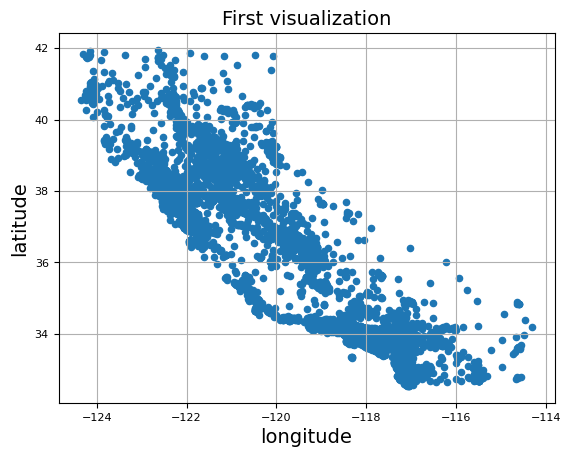

In [21]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True)
plt.title("First visualization")
plt.show()

This visualization can be improved in many ways. First, set the ``alpha`` parameter such that high density areas are highlighted: 

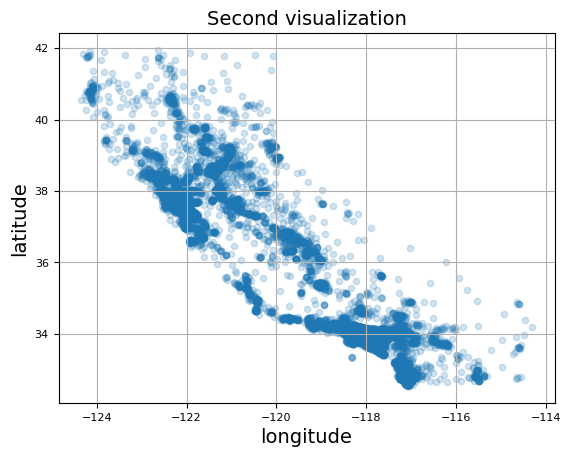

In [22]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, alpha = 0.2)
plt.title("Second visualization")
plt.show()

High density areas are indeed located around San Francisco, LA and San Diego, or near Sacramento and Fresno. 
We can go a step beyond by correlating dot sizes with their respective populations. Also, we can color data based on the median house value: 

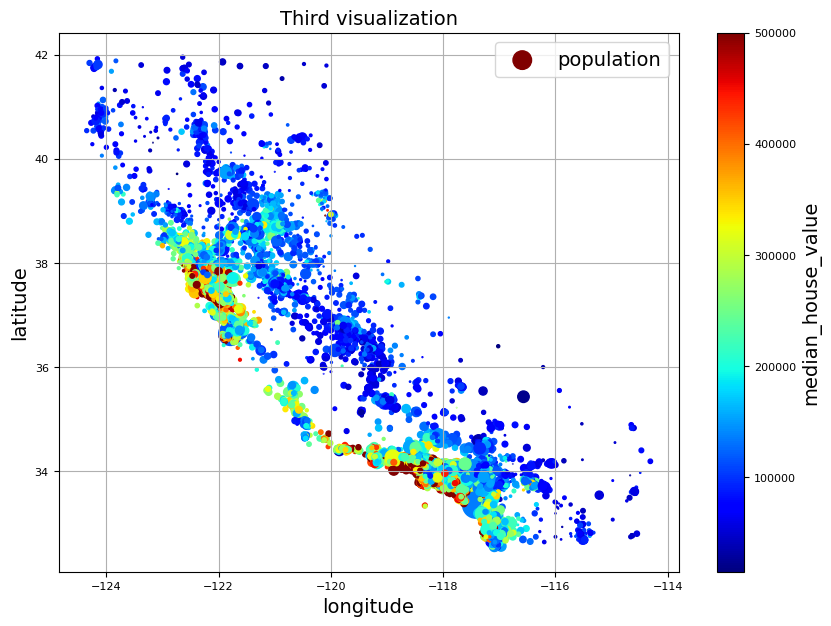

In [23]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, 
             s = housing["population"] / 100, label = "population", figsize = (10, 7),
             c = "median_house_value", cmap = "jet")
plt.title("Third visualization")
plt.show()

Finally, we can layer this graph on top of an image of California!

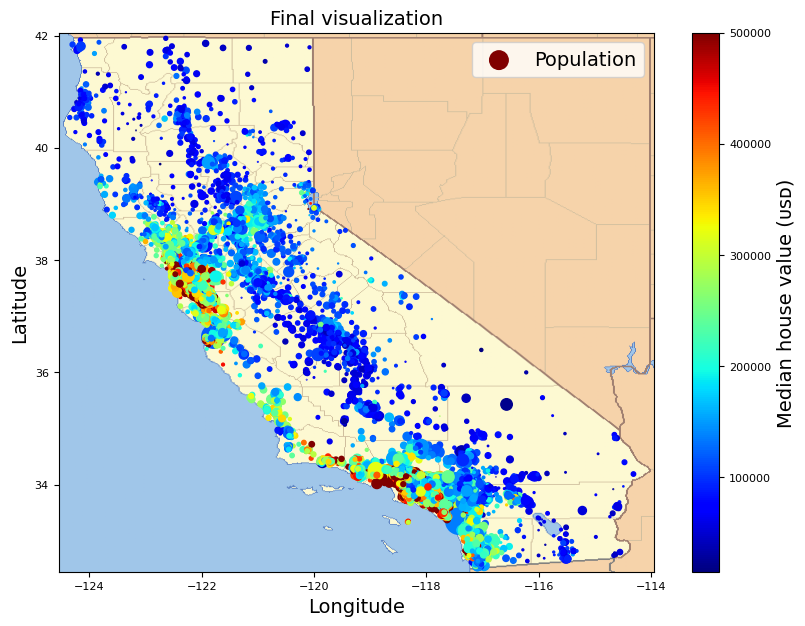

In [24]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread("../data/housing/california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.title("Final visualization")
plt.imshow(california_img, extent=axis)
plt.show()

#### Looking for Correlations

Now, let's compute the correlation matrix of our dataset using ``corr()``. We must set ``numeric_only`` to ``True`` to ensure that categorical variables are omitted, otherwise the method throws an error.

In [25]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687002
total_rooms           0.137770
housing_median_age    0.105504
households            0.070215
total_bedrooms        0.053961
population           -0.022557
longitude            -0.045614
latitude             -0.143660
Name: median_house_value, dtype: float64

We can also use ``scatter_matrix()`` from pandas to plot every variable pairing possible. We restrict this visualization to the four (*seemingly*) relevant features (with respect to ``median_house_value``):

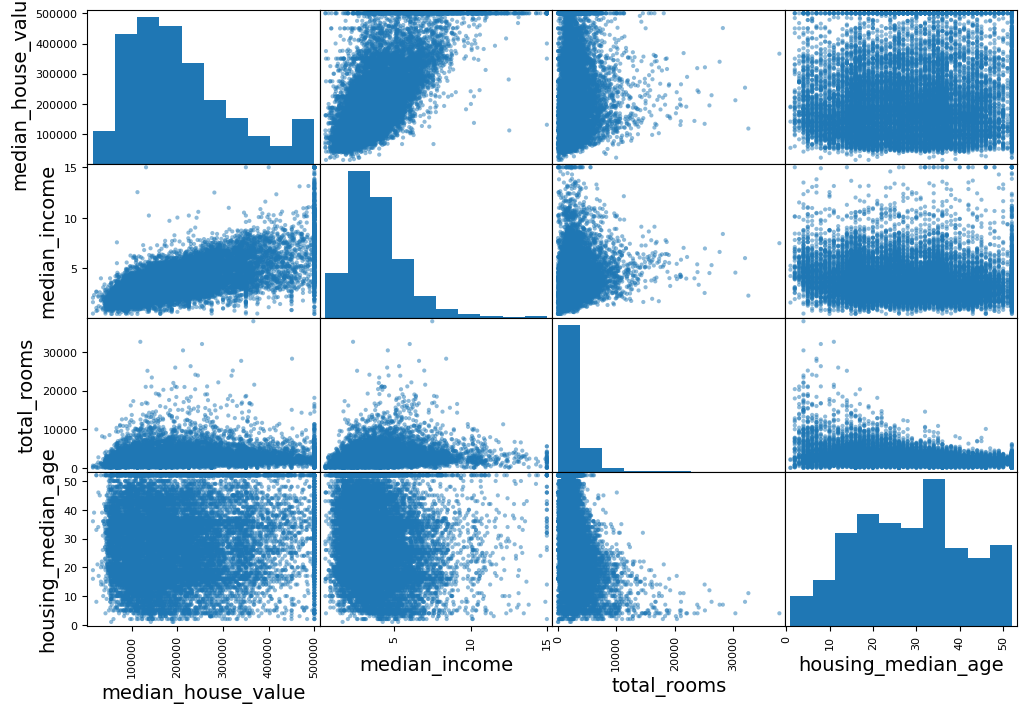

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()

We may focus on the only relevant graph here.

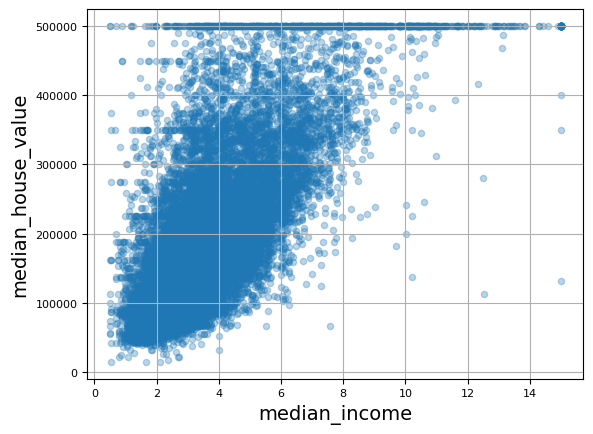

In [27]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.3, grid = True)
plt.show()

There seems to be a strong correlation between the two variables.
Additionnally, we can observe the capping of the variable through the straight line at 500 000$. There are more cappings less visible, happening at around 280 000$, 350 000$, 450 000$ marks.

#### Experimenting with Attribute Combinations

We could try one last transformation in order to find correlations. Let's add three new variables based on existing ones.

In [28]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] 
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

By computing the correlation matrix, we see that the variables ``rooms_per_house`` and ``bedrooms_ratio`` both have some correlation to our target variable. 

In [29]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687002
rooms_per_house       0.147267
total_rooms           0.137770
housing_median_age    0.105504
households            0.070215
total_bedrooms        0.053961
population           -0.022557
people_per_house     -0.023213
longitude            -0.045614
latitude             -0.143660
bedrooms_ratio       -0.253909
Name: median_house_value, dtype: float64

## Data Cleaning

We separate the target from the features.

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Handling Missing Values

#### By hand

There are several options available to deal with missing values. Remember that those values are located on a single variable, namely ``total_bedrooms``.

* Drop any row that contains a missing value
* Drop the variable ``total_bedrooms`` altogether
* Fill the missing values with a convenient placeholder.

In [31]:
nulls_rows_idx = housing.isnull().any(axis = 1)
housing.loc[nulls_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15349,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594,<1H OCEAN
8305,-118.19,33.98,36.0,4179.0,NaN,4582.0,1196.0,2.0087,<1H OCEAN
9030,-117.23,32.75,5.0,1824.0,NaN,892.0,426.0,3.4286,NEAR OCEAN
13093,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,NEAR BAY
3304,-118.21,34.07,52.0,1770.0,NaN,1848.0,439.0,2.4135,<1H OCEAN


If you want to experiment on your DataFrame, do it on a copy as to avoid irreversible, unwanted changes on your dataset.

In [32]:
housing_option1 = housing.copy()

housing_option1 = housing_option1.dropna() # NaNs are all on the same variable, there's no need to specify (subset = ["total_bedrooms"])
housing_option1.loc[nulls_rows_idx] # Empty DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [33]:
housing_option2 = housing.copy()
housing_option2 = housing_option2.drop(columns = "total_bedrooms")
housing_option2 = housing_option2.dropna(axis = 1) # NaNs are all on the same variable, so this does the same thing as the line before
housing_option2.loc[nulls_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
15349,-117.91,33.76,20.0,4413.0,4818.0,1063.0,2.8594,<1H OCEAN
8305,-118.19,33.98,36.0,4179.0,4582.0,1196.0,2.0087,<1H OCEAN
9030,-117.23,32.75,5.0,1824.0,892.0,426.0,3.4286,NEAR OCEAN
13093,-122.16,37.45,47.0,4234.0,1808.0,1093.0,4.2297,NEAR BAY
3304,-118.21,34.07,52.0,1770.0,1848.0,439.0,2.4135,<1H OCEAN


In [34]:
housing_option3 = housing.copy()
housing_option3["total_bedrooms"] = housing_option3["total_bedrooms"].fillna(housing["total_bedrooms"].median())
housing_option3.loc[nulls_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15349,-117.91,33.76,20.0,4413.0,434.0,4818.0,1063.0,2.8594,<1H OCEAN
8305,-118.19,33.98,36.0,4179.0,434.0,4582.0,1196.0,2.0087,<1H OCEAN
9030,-117.23,32.75,5.0,1824.0,434.0,892.0,426.0,3.4286,NEAR OCEAN
13093,-122.16,37.45,47.0,4234.0,434.0,1808.0,1093.0,4.2297,NEAR BAY
3304,-118.21,34.07,52.0,1770.0,434.0,1848.0,439.0,2.4135,<1H OCEAN


#### Using SimpleImputer

Scikit-Learn has a set of transformers for [missing value imputation](https://scikit-learn.org/stable/api/sklearn.impute.html). The simplest one is the ``SimpleImputer`` class, which supports simple strategies such as median imputation. Like we did with the correlation matrix, we must exclude categorical variables to avoid errors.

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_num = housing.select_dtypes(include = [np.number])
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [36]:
print(imputer.statistics_)
print(housing_num.median().values) # This returns the same array as expected.
print(f"Feature names are {imputer.feature_names_in_}, Imputer's strategy is {imputer.strategy}")

[-118.5      34.26     29.     2115.      434.     1164.      409.
    3.5392]
[-118.5      34.26     29.     2115.      434.     1164.      409.
    3.5392]
Feature names are ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'], Imputer's strategy is median


As part of Scikit-Learn's API convention, transformed data is returned as a NumPy array, so if we want to observe the processed data we might need to cast it back to a DataFrame. Here, we can see we have the same result as previously (with ``housing_option3``). Another option is to call either the global function ``set_config(transform_output = "pandas")`` or the transformer's method ``set_output(transform = "pandas")``. Pandas must be installed in order for those commands to work.

In [37]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
display(housing_tr.loc[nulls_rows_idx].head())

imputer.set_output(transform = "pandas") 
housing_tr = imputer.transform(housing_num)
display(housing_tr.loc[nulls_rows_idx].head())

# Otherwise: (sklearn >= 1.2)
# from sklearn import set_config
# set_config(transform_output = "pandas")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15349,-117.91,33.76,20.0,4413.0,434.0,4818.0,1063.0,2.8594
8305,-118.19,33.98,36.0,4179.0,434.0,4582.0,1196.0,2.0087
9030,-117.23,32.75,5.0,1824.0,434.0,892.0,426.0,3.4286
13093,-122.16,37.45,47.0,4234.0,434.0,1808.0,1093.0,4.2297
3304,-118.21,34.07,52.0,1770.0,434.0,1848.0,439.0,2.4135


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15349,-117.91,33.76,20.0,4413.0,434.0,4818.0,1063.0,2.8594
8305,-118.19,33.98,36.0,4179.0,434.0,4582.0,1196.0,2.0087
9030,-117.23,32.75,5.0,1824.0,434.0,892.0,426.0,3.4286
13093,-122.16,37.45,47.0,4234.0,434.0,1808.0,1093.0,4.2297
3304,-118.21,34.07,52.0,1770.0,434.0,1848.0,439.0,2.4135


### Handling outliers

We can weed out outliers from the dataset, using an ``IsolationForest``. We won't do it here but just know it's feasible.

In [38]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state = 42)
outlier_pred = isolation_forest.fit_predict(X)

#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

### Handling Text and Categorical Attributes

We need to numerize categorical inputs. Depending on the type of variable we might use a different strategy. Here, we take a look at ``ocean_proximity`` values.

In [39]:
housing_cat = housing[["ocean_proximity"]]
display(housing_cat.head(8))
print(housing_cat.value_counts())

,ocean_proximity
10058,<1H OCEAN
6616,NEAR BAY
11481,<1H OCEAN
5723,<1H OCEAN
18905,<1H OCEAN
3526,NEAR BAY
2347,<1H OCEAN
6952,INLAND


ocean_proximity
<1H OCEAN          7342
INLAND             5202
NEAR OCEAN         2139
NEAR BAY           1825
ISLAND                4
Name: count, dtype: int64


We can try to encode the variable using an ``OrdinalEncoder``.

In [40]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.set_output(transform = "pandas")
housing_cat_encoded = oe.fit_transform(housing_cat)
display(housing_cat_encoded.head(8))
print(oe.categories_)

,ocean_proximity
10058,0.0
6616,3.0
11481,0.0
5723,0.0
18905,0.0
3526,3.0
2347,0.0
6952,1.0


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


However this doesn't seem like the optimal choice. Ordinal encoding supposes that there's an order between the categories, which doesn't seem to be the case here. We typically use ordinal encoding for variables like reviews (where the modalities could range from "good" to "bad"). 

We could try one-hot encoding instead. Transformed data will be a sparse array, which can be converted back into a dense array using the ``toarray()`` method. Alternatively, specify ``sparse_output = False`` during the instanciation of the encoder to force the output type.

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# Do not try to call set_output(transform = "pandas") as it will throw an error. It cannot implicitly cast sparse matrices into pandas DataFrames.
housing_cat_1hot = ohe.fit_transform(housing_cat)
print(f"Transformed data type: {type(housing_cat_1hot)}")
housing_cat_1hot = housing_cat_1hot.toarray()
print(f"Reverted data type to {type(housing_cat_1hot)}")

Transformed data type: <class 'scipy.sparse._csr.csr_matrix'>
Reverted data type to <class 'numpy.ndarray'>


In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)
ohe.set_output(transform = "pandas")
housing_cat_1hot = ohe.fit_transform(housing_cat)
display(housing_cat_1hot.head(8))
(f"One-Hot Encoder categories: {ohe.categories_}")

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10058,1.0,0.0,0.0,0.0,0.0
6616,0.0,0.0,0.0,1.0,0.0
11481,1.0,0.0,0.0,0.0,0.0
5723,1.0,0.0,0.0,0.0,0.0
18905,1.0,0.0,0.0,0.0,0.0
3526,0.0,0.0,0.0,1.0,0.0
2347,1.0,0.0,0.0,0.0,0.0
6952,0.0,1.0,0.0,0.0,0.0


"One-Hot Encoder categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],\n      dtype=object)]"

Finally, we can also rely on ``get_dummies()`` from the pandas library. This behaves very similarly to the ``OneHotEncoder`` from Scikit-Learn (small differences are present though). Below we'll explore some interesting edge cases.

``get_dummies()`` creates as many columns as there are values in the dataset. You can see here that it creates two variables based on "INLAND" and "NEAR BAY".

In [43]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


What if there are unrepresented values in our dataset ? For instance, our train set may contain no block that has an ocean proximity equal to "<1H OCEAN". But we **know** this value can appear in the test set.
Contrary to the One Hot Encoder, this function doesn't fit our dataset, so it *doesn't know* if there exists additional values (like "ISLAND" or "NEAR OCEAN"). We can apply our previously trained encoder to this new DataFrame and the result will be different: 

In [44]:
ohe.transform(df_test)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


Now, what happens if new values were to appear in the variable ? Maybe one row has a value set to "<2H OCEAN", which our encoder hasn't been trained upon. To amend this, we have to specify a way to handle unknown entries. In this case we may choose to simply ignore them. 

In [45]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [46]:
try: 
    ohe.transform(df_test_unknown)
except ValueError:
    print("ValueError!")

ohe.handle_unknown = "ignore"
ohe.transform(df_test_unknown)

# If set_ouptut hasn't been called, we can reconstruct the DataFrame using this method:
# df_output = pd.DataFrame(ohe.transform(df_test_unknown), columns = ohe.get_features_names_out(), index = df_test_unknown.index)

ValueError!


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### Feature Scaling

#### Scaling the features

We need to scale our variables so that they all share a similar range. There are two basic methods for this: **min-max scaling** (or **normalization**) and **Z scaling** (or **standardization**)

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler(feature_range = (-1, 1))
mm_scaler.set_output(transform = "pandas")
housing_num_min_max = mm_scaler.fit_transform(housing_num)

std_scaler = StandardScaler()
std_scaler.set_output(transform = "pandas")
housing_num_std = std_scaler.fit_transform(housing_num)

display(housing_num_min_max.head())
display(housing_num_std.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10058,0.466135,-0.900106,-0.607843,-0.925865,-0.942893,-0.970515,-0.945733,0.000234
6616,-0.539841,0.154091,-0.647059,-0.948960,-0.902235,-0.964797,-0.906265,-0.749617
11481,0.193227,-0.696068,-0.294118,-0.755082,-0.602731,-0.836655,-0.631640,-0.698983
5723,0.229084,-0.662062,0.686275,-0.856160,-0.871508,-0.940918,-0.860878,0.023627
18905,0.300797,-0.732200,-0.450980,-0.831220,-0.799503,-0.920906,-0.804637,-0.510558


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10058,1.288845,-1.227891,-1.400293,-0.562980,-0.842405,-0.789267,-0.876226,2.048993
6616,-1.233369,1.098350,-1.479755,-0.765754,-0.528109,-0.699167,-0.559612,-0.820247
11481,0.604601,-0.777651,-0.764601,0.936524,1.787128,1.320136,1.643493,-0.626501
5723,0.694502,-0.702611,1.221938,0.049043,-0.290587,-0.322866,-0.195506,2.138504
18905,0.874303,-0.857381,-1.082447,0.268020,0.266029,-0.007516,0.255669,0.094490


These solutions may not be adapted for more complex distributions. For instance, variables with *heavy tails* (i.e when values that are far from the mean are not exponentially rare) may be transformed prior to the scaling (with a log or a sqrt function for e.g)

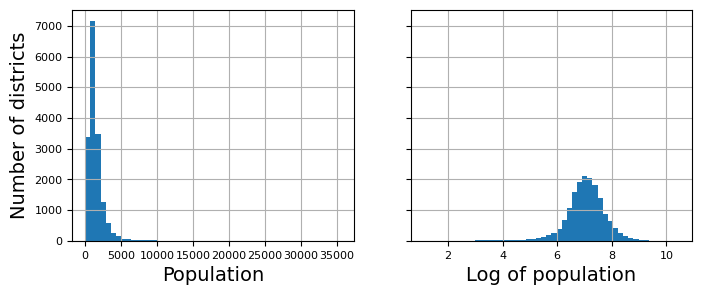

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

Another approach to handle heavy-tailed features consists in *bucketizing* the feature. This means chopping its distribution into roughly equal-sized
buckets, and replacing each feature value with the index of the bucket it belongs to. For example, you could replace each value with its percentile. Bucketizing with equal-sized buckets results in a feature with an almost uniform distribution, so there’s no need for further scaling, or you can just divide by the number of buckets to force the values to the 0–1 range.


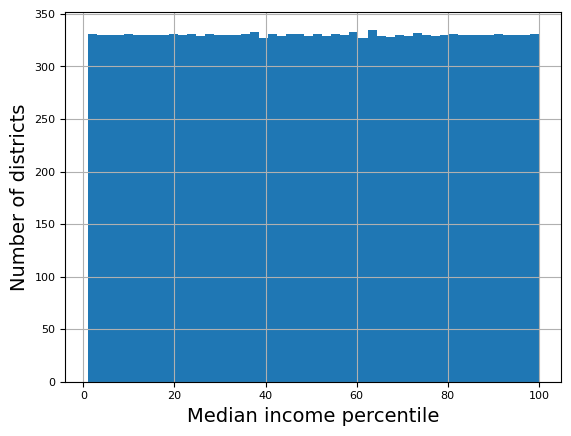

In [49]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

As for *multimodal distributions* like the housing median age, we can add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode. The similarity measure is typically computed using a **radial basis function (RBF)**

In [50]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma = 0.1)

print(age_simil_35)

[[9.65245626e-26]
 [7.18778174e-28]
 [7.62186519e-12]
 ...
 [2.73237224e-02]
 [2.18742046e-32]
 [4.24835426e-18]]


The graph below shows the new feature as a function of the housing median age, for different values of gamma.

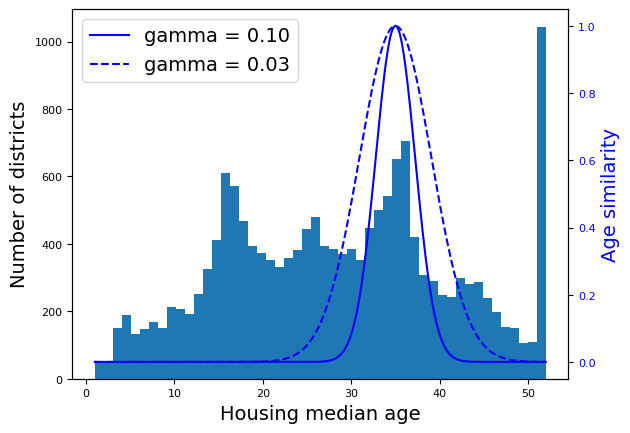

In [51]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

#### Scaling the Target

Sometimes you'll also need to scale the target variable (maybe it has a heavy-tail). In this case, our model will predict the transformed target variable, so we must not forget to revert the transformations to obtain the original scale.

Below is a simplified illustration: we standardize the target, then fit a **Linear Regression** model to it. The predicted values must be reverted (this is easily achievable with the ``inverse_transform()`` method)

In [52]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels =  target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # Pretend this is new data

scaled_pred = model.predict(some_new_data)
pred = target_scaler.inverse_transform(scaled_pred)
print(pred)

[[369810.8948374 ]
 [142100.49562126]
 [157476.65446467]
 [376914.67184596]
 [214696.40547528]]


This process is pipelined into a single class called ``TransformedTargetRegressor``.

In [53]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
pred = model.predict(some_new_data)
print(pred)

[369810.8948374  142100.49562126 157476.65446467 376914.67184596
 214696.40547528]


#### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom transformations, cleanup operations, or combining specific attributes.

For example, we can create a log-transformer (which deals with heavy-tailed variables) and apply it to the ``population`` feature:


In [54]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

display(log_pop.head())

,population
10058,6.270988
6616,6.447306
11481,7.978311
5723,6.963190
18905,7.254178


The ``inverse_func`` is optional (required if we plan to use the transformer in a ``TransformedTargetRegressor``).

Below is an implementation of the ``age_simil_35`` feature we described earlier, using a custom transformer. 

In [55]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1)) # Notice the use of kwargs hyperparameters
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

print(age_simil_35)

[[9.65245626e-26]
 [7.18778174e-28]
 [7.62186519e-12]
 ...
 [2.73237224e-02]
 [2.18742046e-32]
 [4.24835426e-18]]


Note that ``rbf_kernel()`` does not treat the features separately. If you pass it an array with two features, it will measure the 2D distance (Euclidean) to measure similarity. For example, here’s how to add a feature that will measure the geographic similarity between each district and San
Francisco:

In [56]:

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

print(sf_simil)

[[0.00547224]
 [0.98265577]
 [0.04559413]
 ...
 [0.05211826]
 [0.06961506]
 [0.00134495]]


Custom transformers are also useful to combine features. For example, here’s a ``FunctionTransformer`` that computes the ratio between the input features 0 and 1:

In [57]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
print(ratio_transformer.transform(np.array([[1., 2.], [3., 4.]])))

[[0.5 ]
 [0.75]]


If we want to create a transformer that is trainable, we can construct a class, and all it needs is three methods: ``fit()`` (which must return self), ``transform()``, and ``fit_transform()``.

You can get ``fit_transform()`` for free by simply adding ``TransformerMixin`` as a base class: the default implementation will just call ``fit()`` and then ``transform()``. If you add ``BaseEstimator`` as a base class (and avoid using ``*args`` and ``**kwargs`` in your constructor), you will also get two extra methods: ``get_params()`` and ``set_params()``. These will be useful for automatic hyperparameter tuning.


In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

Here are a few things to note:
* The sklearn.utils.validation package contains several functions we can use to validate the inputs. Production code should have them.
* Scikit-Learn pipelines require the ``fit()`` method to have two arguments ``X`` and ``y``, which is why we need the ``y=None`` argument even though we don’t use ``y``.
* All Scikit-Learn estimators set ``n_features_in_`` in the ``fit()`` method, and they ensure that the data passed to ``transform()`` or ``predict()`` has this number of features. The ``fit()`` method must return ``self``.
* This implementation is not 100% complete: all estimators should set ``feature_names_in_`` in the ``fit()`` method when they are passed a DataFrame. Moreover, all transformers should provide a ``get_feature_names_out()`` method, as well as an ``inverse_transform()`` method when their ransformation can be reversed.


A custom transformer can (and often does) use other estimators in its implementation. For example, the following code demonstrates custom transformer that uses a KMeans clusterer in the ``fit()`` method to identify the main clusters in the training data, and then uses ``rbf_kernel()`` in the ``transform()`` method to measure how similar each sample is to each cluster center:

In [59]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
# To verify the validity of our custom estimator, pass an instance to the function is_estimator()

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
print(similarities[:3].round(2))

[[0.05 0.   0.99 0.   0.   0.   0.   0.   0.   0.26]
 [0.   0.33 0.   0.   0.24 0.   0.   0.91 0.6  0.  ]
 [0.99 0.   0.06 0.   0.   0.07 0.   0.   0.   0.71]]


The graph below shows the 10 cluster centers found by k-means. The districts are colored according to their geographic similarity to their closest cluster center. Most clusters are located in highly populated and expensive areas.

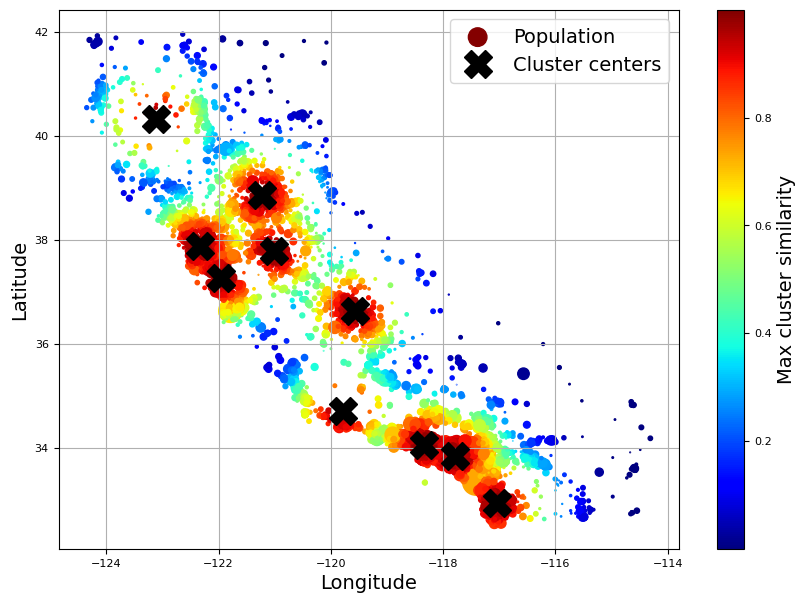

In [60]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### Transformation Pipelines

We can group various data preparation steps into a single pipeline.

In [61]:
# Run this cell to have interactive diagram outputs
from sklearn import set_config

set_config(display="diagram")

In [62]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), 
    ("standardize", StandardScaler())])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

Naming the components can be avoided using the ``make_pipeline()`` function:

In [63]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

All components except the last one are transformers. The last estimator can be anything. Calling ``fit()`` on the pipeline effectively calls ``fit_transform()`` on all the transformers until it reaches the final estimator, for which it only calls the ``fit()`` method. 

The pipeline exposes the same methods as the final estimator. In this example the last estimator is a ``StandardScaler``, which is a transformer, so the pipeline also acts like a transformer.

In [64]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10058,1.288845,-1.227891,-1.400293,-0.562980,-0.843998,-0.789267,-0.876226,2.048993
6616,-1.233369,1.098350,-1.479755,-0.765754,-0.528150,-0.699167,-0.559612,-0.820247
11481,0.604601,-0.777651,-0.764601,0.936524,1.798513,1.320136,1.643493,-0.626501
5723,0.694502,-0.702611,1.221938,0.049043,-0.289457,-0.322866,-0.195506,2.138504
18905,0.874303,-0.857381,-1.082447,0.268020,0.269907,-0.007516,0.255669,0.094490


Pipelines can be easily manipulated: 

In [65]:
print(f"The steps of the pipeline are:\n{num_pipeline.steps}\n")
print(f"The second component of the pipeline is: {num_pipeline[1]}\n")
print(f"The pipeline without the last component is:\n{num_pipeline[:-1]}\n")
print(f"Accessing a component of the pipeline via its name: simpleimputer = {num_pipeline.named_steps['simpleimputer']}")

# Setting parameters manually
num_pipeline.set_params(simpleimputer__strategy = "most_frequent")

The steps of the pipeline are:
[('simpleimputer', SimpleImputer(strategy='median')), ('standardscaler', StandardScaler())]

The second component of the pipeline is: StandardScaler()

The pipeline without the last component is:
Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

Accessing a component of the pipeline via its name: simpleimputer = SimpleImputer(strategy='median')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

Using pipelines, we can define a single transformer that handles the preprocessing of both numerical and categorical variables at once.

In [66]:
from sklearn.compose import ColumnTransformer


num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline.set_params(simpleimputer__strategy = "median") # revert previous cell's change

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

Similar to pipelines, column transformers have convenient functions available to automatize the process further.

In [67]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

housing_prepared = preprocessing.fit_transform(housing)

### Final Pipeline (Encompassing Every Step at Once)

We now want to create a single pipeline that will perform all the transformations you’ve experimented with up to now. Let’s recap what the
pipeline will do and why: 
* Missing values in numerical features will be imputed by replacing them with the median, as most ML algorithms don’t expect missing values. In categorical features, missing values will be replaced by the most frequent category.
* The categorical feature will be one-hot encoded, as most ML algorithms only accept numerical inputs.
* A few ratio features will be computed and added: ``bedrooms_ratio``, ``rooms_per_house``, and ``people_per_house``. Hopefully these will better correlate with the median house value, and thereby help the ML models.
* A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.
* Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.
* All numerical features will be standardized, as most ML algorithms prefer when all features have roughly the same scale.

In [68]:
def column_ratio(X): 
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline) # One column remaining: housing_median_age

In [69]:
housing_prepared = preprocessing.fit_transform(housing)
print(f"Shape of the preprocessed housing dataset: {housing_prepared.shape}")
print(f"All the features present in our dataset:\n{preprocessing.get_feature_names_out()}")

Shape of the preprocessed housing dataset: (16512, 24)
All the features present in our dataset:
['bedrooms__ratio' 'rooms_per_house__ratio' 'people_per_house__ratio'
 'log__total_bedrooms' 'log__total_rooms' 'log__population'
 'log__households' 'log__median_income' 'geo__Cluster 0 similarity'
 'geo__Cluster 1 similarity' 'geo__Cluster 2 similarity'
 'geo__Cluster 3 similarity' 'geo__Cluster 4 similarity'
 'geo__Cluster 5 similarity' 'geo__Cluster 6 similarity'
 'geo__Cluster 7 similarity' 'geo__Cluster 8 similarity'
 'geo__Cluster 9 similarity' 'cat__ocean_proximity_<1H OCEAN'
 'cat__ocean_proximity_INLAND' 'cat__ocean_proximity_ISLAND'
 'cat__ocean_proximity_NEAR BAY' 'cat__ocean_proximity_NEAR OCEAN'
 'remainder__housing_median_age']


## Select and Train a Model

### Training and Evaluating on the Training Set

First shot should be a basic model. Let's try a Linear Regression model:

In [70]:
from sklearn.linear_model import LinearRegression

lr = make_pipeline(preprocessing, LinearRegression())
lr.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002575A8FF550>)])),
                ('linearregression', LinearRegression())])

We can observe some of its predictions, and it's not looking good... 

In [71]:
housing_pred = lr.predict(housing)
pred = housing_pred[:5].round(-2) # Rounded to the nearest hundred
print(f"Linear Regression predictions: {pred}")
print(f"Compared to the real values: {housing_labels.iloc[:5].values}")

error_ratios = pred / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

Linear Regression predictions: [275500. 186700. 220400. 375200. 241000.]
Compared to the real values: [500001. 140600. 142500. 477800. 165600.]
-44.9%, 32.8%, 54.7%, -21.5%, 45.5%


By computing the RMSE, we can see the model is absolute trash. It's clearly underfitting so we must move on to other models.

In [72]:
from sklearn.metrics import root_mean_squared_error

lr_rmse = root_mean_squared_error(housing_labels, housing_pred)
print(f"The RMSE for our Linear Regression model is: {lr_rmse:.2f}")

The RMSE for our Linear Regression model is: 69182.79


We can try a Decision Tree next:

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002575A8FF550>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [74]:
housing_pred = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_pred)
print(f"The RMSE for our Decision Tree Regressor is: {tree_rmse}... Wait what ?")

The RMSE for our Decision Tree Regressor is: 0.0... Wait what ?


Surely this is wrong. This time, the model has overfitted to the training data. To verify this hypothesis without using the test set, we need to
use part of the training set for training and part of it for model validation.

### Better Evaluation Using Cross-Validation

We can use Scikit-Learn’s k_-fold cross-validation feature.

The following code randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores.

**Note**: Scikit-Learn’s cross-validation features expect a *utility function* (greater is better) rather than a *cost function* (lower is better), so the scoring function is actually the opposite of the RMSE. It’s a negative value, so you need to switch the sign of the output to get the RMSE scores.


In [75]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

count       10.000000
mean     66122.946216
std       2193.934436
min      62912.824412
25%      64612.830579
50%      65678.120816
75%      67884.331521
max      69800.133098
dtype: float64

With that in mind, we observe that the decision tree is also trash!! It confirms our initial thoughts: a low training error with a high validation error is synonymous with severe overfitting.

Let's try a Random Forest this time.

**Warning**: the following cell may take a few minutes to run.

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

pd.Series(forest_rmses).describe()

count       10.000000
mean     47315.630507
std       1263.071060
min      45738.591461
25%      46173.606551
50%      47350.756721
75%      47908.297002
max      49506.663015
dtype: float64

This is much better: random forests really look very promising for this task! However, if we train a RandomForest and measure the RMSE on the training set, we will find roughly 17,474: that’s much lower, meaning that there’s still quite a lot of overfitting going on. Possible solutions are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. 

Before we dive much deeper into random forests, however, we should try out many other models from various categories of machine learning algorithms (e.g., several support vector machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

### Fine-Tune Our Models

#### Grid-Search

A Grid-Search will use cross-validation to evaluate all the possible combinations of selected hyperparameter values. 

**Warning**: The following cell may take a few minutes to run.

In [79]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002575A8FF550>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

To see which hyperparameters can be tuned: 

In [82]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 

We can retrieve the best hyperparameter combination as well as the best estimator using the following syntax:

In [85]:
print(f"The best values for the hyperparameters are: {grid_search.best_params_}")
print(f"The best estimator is:\n {grid_search.best_estimator_}")

The best values for the hyperparameters are: {'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}
The best estimator is:
 Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000025...
     

Let's look at the score of each hyperparameter combination tested during the grid search:



In [86]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43051,44084,44792,43976
13,15,8,43397,44440,45601,44479
6,10,4,43598,44568,45638,44602
9,10,6,43906,44841,45679,44809
7,10,6,43906,44841,45679,44809


#### Randomized Search

In [87]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (``n_iter`` × ``cv``) random combinations of hyperparameters:

**Warning**: The following cell may take a few minutes to run.

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002575BFE68F0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002575BFE51E0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

We can display the results of the random search like below:

In [89]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41428,42632,43070,42377
8,32,7,41692,42978,43537,42735
5,42,4,42246,43272,43695,43071
0,41,16,42363,43507,43973,43281
6,24,3,42587,43610,43822,43340


#### Ensemble Methods (see Chapter 7)

### Analyze the Best Models and Their Errors

We can inspect the best models to gain crucial insight. For instance, we can see the relative importance of each attribute for making accurate predictions:

In [98]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances.round(4),
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.189), 'log__median_income'),
 (np.float64(0.0733), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.0684), 'bedrooms__ratio'),
 (np.float64(0.0513), 'rooms_per_house__ratio'),
 (np.float64(0.0484), 'people_per_house__ratio'),
 (np.float64(0.044), 'geo__Cluster 2 similarity'),
 (np.float64(0.0229), 'geo__Cluster 30 similarity'),
 (np.float64(0.021), 'geo__Cluster 36 similarity'),
 (np.float64(0.0203), 'geo__Cluster 43 similarity'),
 (np.float64(0.0196), 'geo__Cluster 10 similarity'),
 (np.float64(0.0186), 'geo__Cluster 34 similarity'),
 (np.float64(0.0184), 'geo__Cluster 28 similarity'),
 (np.float64(0.0171), 'geo__Cluster 7 similarity'),
 (np.float64(0.0146), 'geo__Cluster 44 similarity'),
 (np.float64(0.0139), 'geo__Cluster 22 similarity'),
 (np.float64(0.0138), 'geo__Cluster 29 similarity'),
 (np.float64(0.0134), 'geo__Cluster 42 similarity'),
 (np.float64(0.0132), 'geo__Cluster 21 similarity'),
 (np.float64(0.0131), 'geo__Cluster 9 similarity'),
 (np.float64(0.0127), 'g

With this information, we may want to try dropping some of the less useful features (e.g., apparently only one ``ocean_proximity`` category is really useful, so we could try dropping the others).

*Note*: The ``sklearn.feature_selection.SelectFromModel`` transformer can automatically drop the least useful features for you: when you fit it, it trains a model (typically a random forest), looks at its ``feature_importances_`` attribute, and selects the most useful features. Then when you call transform(), it drops the other features.


We should also look at the specific errors that the system makes, then try to understand why it makes them and what could fix the problem: adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.

Now is also a good time to ensure that our model not only works well on average, but also on all categories of districts, whether they’re rural or urban, rich or poor, northern or southern, minority or not, etc. Creating subsets of our validation set for each category takes a bit of work, but it’s important: if our model performs poorly on a whole category of districts, then it should probably not be deployed until the issue is solved, or at least it should not be used to make predictions for that category, as it may do more harm than good.

### Evaluating our System on the Test Set

Once we're ready to evaluate the model on the test set, just run the predictions and observe its score.

In [99]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

39798.67662806064


To have an idea of how precise this estimate is, we can compute a 95% confidence interval for the generalization error using ``scipy.stats.t.interval()``:

In [101]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

print(f"The 95% confidence interval for the test RMSE is equal to: [{rmse_lower:.3f}, {rmse_upper:.3f}]")

The 95% confidence interval for the test RMSE is equal to: [37908.610, 41909.615]


### Model Persistence Using Joblib

Save the final model:

In [102]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

## Annex (Optional)

### About stratification (Optional)

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The ``cdf()`` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [76]:
from scipy.stats import binom

sample_size = 1000
ratio_f = 0.511
p_small = binom(sample_size, ratio_f).cdf(485 - 1)
p_large = 1 - binom(sample_size, ratio_f).cdf(535)
print(f"p_total = {p_small + p_large}")

p_total = 0.10736798530929942


We can also get an estimate using simulation:

In [77]:
samples =  (np.random.rand(100_000, sample_size) < ratio_f).sum(axis = 1)
print(((samples < 485) | (samples > 535)).mean())

0.10871


### Choosing the Sampling Distribution for a Hyperparameter

* ``scipy.stats.randint(a, b+1)``: for hyperparameters with discrete values that range from a to b, and all values in that range seem equally likely.
* ``scipy.stats.uniform(a, b)``: this is very similar, but for continuous hyperparameters.
* ``scipy.stats.geom(1 / scale)``: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* ``scipy.stats.expon(scale)``: this is the continuous equivalent of ``geom``. Just set ``scale`` to the most likely value.
* ``scipy.stats.loguniform(a, b)``: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.

Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for ``randint()``, ``uniform()``, ``geom()`` and ``expon()``:

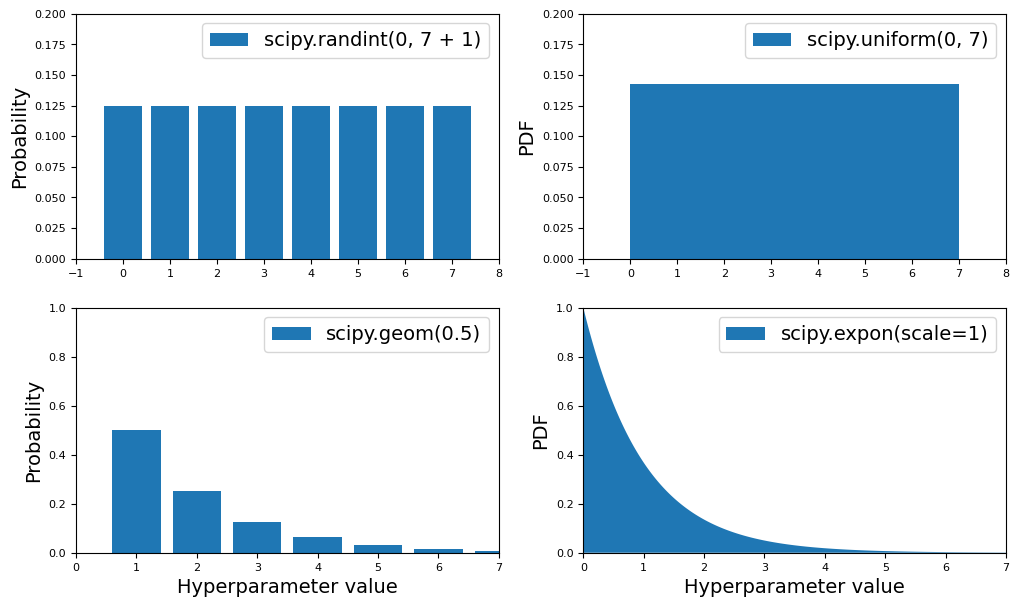

In [90]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for ``expon()`` and ``loguniform()`` (left column), as well as the PDF of ``log(X)`` (right column). The right column shows the distribution of hyperparameter *scales*. You can see that ``expon()`` favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But ``loguniform()`` does not favor any scale, they are all equally likely:

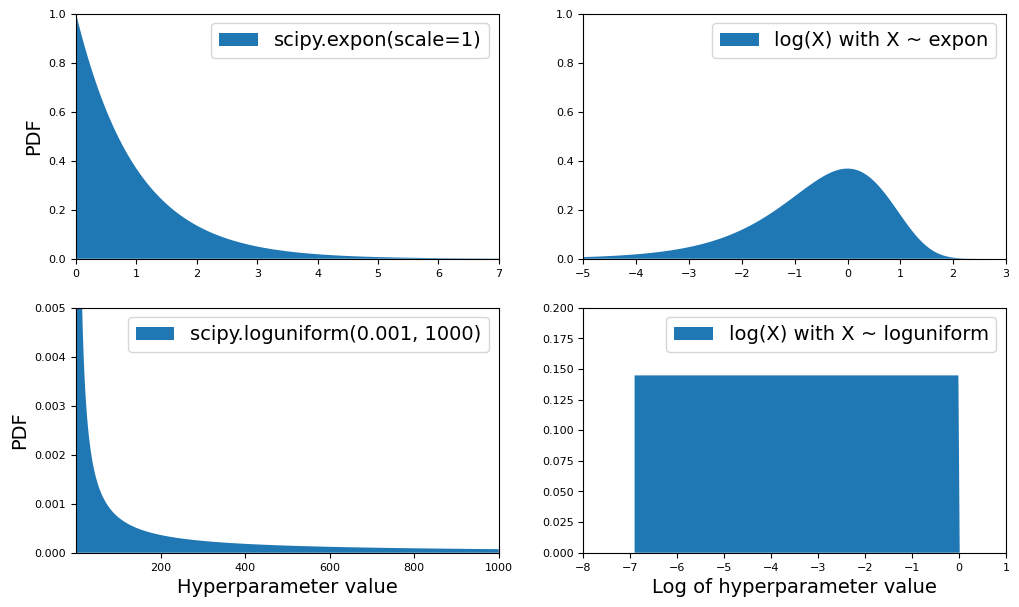

In [91]:
from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

### Exercises

#### 1.1 SVM

Try a Support Vector Machine regressor (``sklearn.svm.SVR``) with various hyperparameters, such as ``kernel="linear"`` (with various values for the ``C`` hyperparameter) or ``kernel="rbf"`` (with various values for the ``C`` and ``gamma`` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best ``SVR`` predictor perform?

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
    {"svr__kernel": ["linear"], "svr__C": [10., 30., 100., 1000., 3000., 10000., 30000.0]},
    {"svr__kernel": ["rbf"], "svr__C": [1.0, 3.0, 10., 30., 100., 300., 1000.0], "svr__gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv = 3, scoring = "neg_root_mean_squared_error")

grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002575A8FF550>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 1000.0, 3000.0, 10000.0,
                                     30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [111]:
svr_grid_search_rmse = -grid_search.best_score_
print(f"The best SVR RMSE is: {svr_grid_search_rmse}")
print(f"The best parameter combination is: {grid_search.best_params_}")

The best SVR RMSE is: 68924.41989597846
The best parameter combination is: {'svr__C': 30000.0, 'svr__kernel': 'linear'}


That's much worse than the RandomForestRegressor (but to be fair, we trained the model on much less data). 

The linear kernel seems better than the RBF kernel. Notice that the value of ``C`` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for ``C`` (removing the smallest values), because it is likely that higher values of ``C`` will be better.